<a href="https://colab.research.google.com/github/yashdeeph709/tensors-with-ztm/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural netwroks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

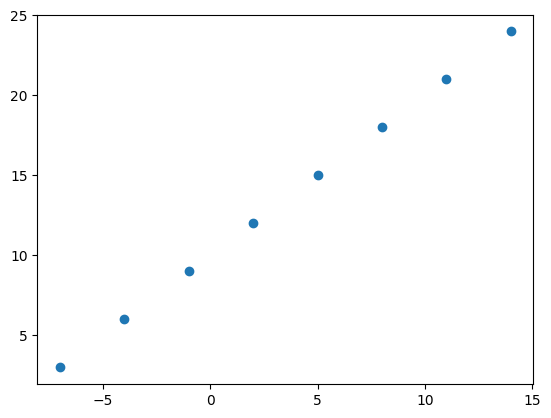

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, Y)
plt.show()

In [4]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes


In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [8]:
X[0].ndim

0

In [9]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
Y = tf.cast(tf.constant(Y), dtype = tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

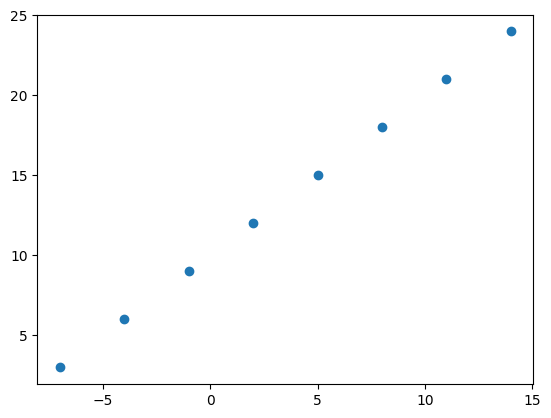

In [11]:
plt.scatter(X, Y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layer of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evaluation metrics ( what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is mean absolute error),
              optimizer = tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step - loss: 13.1744 - mae: 13.1744
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.0419 - mae: 13.0419
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.9094 - mae: 12.9094
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.7769 - mae: 12.7769
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.6444 - mae: 12.6444


In [13]:
# Checkout X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims([17.], axis = -1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[4.606645]], dtype=float32)

In [15]:
y_pred + 11

array([[15.606646]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(neurons), within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or more data (give the model more examples to learn from).

In [16]:
# Let's rebuild our model
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - loss: 15.2057 - mae: 15.2057
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 14.9459 - mae: 14.9459
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14.8134 - mae: 14.8134
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14.6809 - mae: 14.6809
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14.5484 - mae: 14.5484
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.4159 - mae: 14.4159
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.2834 - mae: 14.2834
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.1509 - mae: 14.1509
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14.0184 - mae: 14.0184
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.8859 - mae: 13.8859
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.7534 - mae: 13.7534
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.6209 - mae: 13.6209
Epoch 13/100
1/1 ━━━━━━━

In [17]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's see if our model's prediction has improved...
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[29.54074]], dtype=float32)

In [19]:
# Let's see if we can improve the optimizer

# 1. Create the model
model = tf.keras.Sequential([ tf.keras.layers.Dense(100, activation="relu"), tf.keras.layers.Dense(1)]);

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

# 3. Train the model
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step - loss: 14.2407 - mae: 14.2407
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 13.4377 - mae: 13.4377
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.6327 - mae: 12.6327
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.8349 - mae: 11.8349
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.2553 - mae: 11.2553
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.7287 - mae: 10.7287
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.1911 - mae: 10.1911
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.6417 - mae: 9.6417
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.0811 - mae: 9.0811
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5070 - mae: 8.5070
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.9161 - mae: 7.9161
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.3048 - mae: 7.3048
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [20]:
# Let's see if our model's prediction has improved
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[27.546429]], dtype=float32)

### Evaluating our model

In practice, a typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it --> again same

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

Its a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against teh ground truth (the original labels)

In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

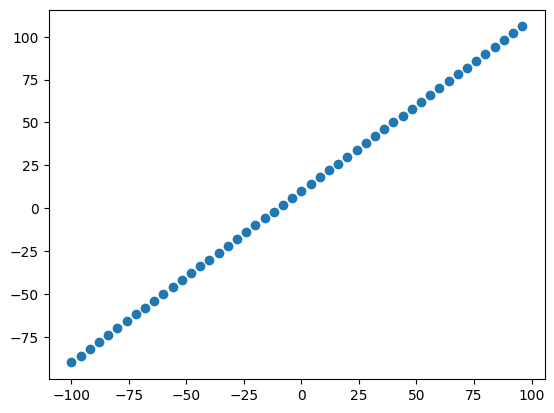

In [23]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluatted on this data to test what it has learned, this set is typically 10-15% of the data available


In [24]:
# Check the length of how many samples we have
len(X)

50

In [25]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples ( 80% of the data )
y_train = y[:40] # last 10 are the testing samples ( 20% of the data )

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... Lets visualize it again!



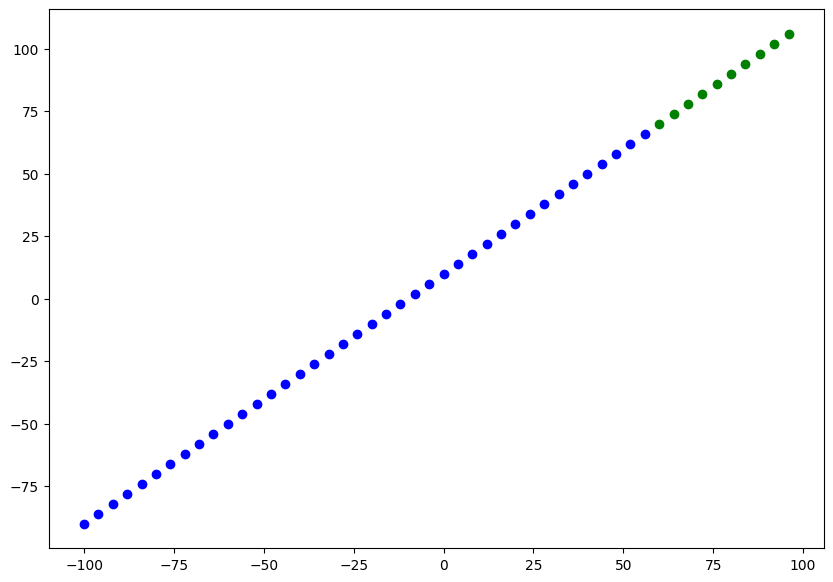

In [26]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")


In [27]:
# Let's have a look at how to build a neural network for this data

# 1. Create a model
model = tf.keras.Sequential([ tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)


In [28]:
# Lets create a model which builds automatically by defining the inputf-shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model ( same as above)
model = tf.keras.Sequential([ tf.keras.layers.Dense(1, input_shape=[1])])

# 2. Compile our model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


To illustrate the suggested approach, here's how you could define the model with an explicit `Input` layer:

In [29]:
tf.random.set_seed(42)

# 1. Create a model using an explicit Input layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)), # Explicitly define the input layer
    tf.keras.layers.Dense(1) # Changed from Dense(3) to Dense(1) to match the output shape
])

# 2. Compile our model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

In [30]:
### Visualizing our model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trians.
* Non-trainable params - these parameters aren't updated during training ( this is typical when you bring pre-trained models) **Transfer Learning**

**Resource:** For more in-depth overview of the trainable  parameters within a layer, check out **MIT's introduction to deep learnng video**

**Excercize:**  Try playing around witth the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`


In [31]:
# let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [32]:
# Get a summary of our model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

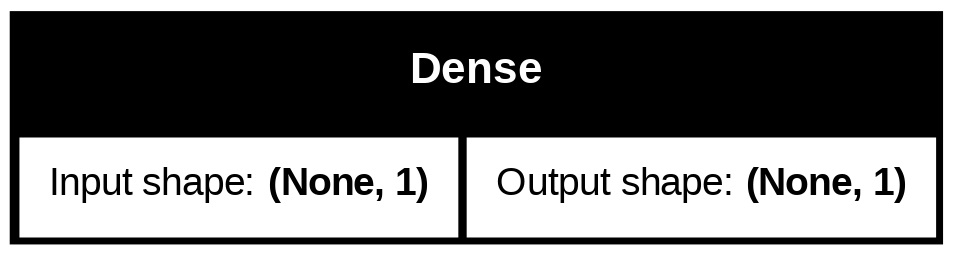

In [33]:
from tensorflow.keras.utils import plot_model

import sys
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install graphviz
plot_model(model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [34]:
# Make some predictions
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[56.45579 ],
       [60.079964],
       [63.704136],
       [67.32831 ],
       [70.95248 ],
       [74.57665 ],
       [78.20082 ],
       [81.825   ],
       [85.44917 ],
       [89.07334 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, its a good idea to turn it into a function.

In [36]:
# Let's create a plotting function

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_label=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=[10, 7])
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Setup the plot
  plt.legend()

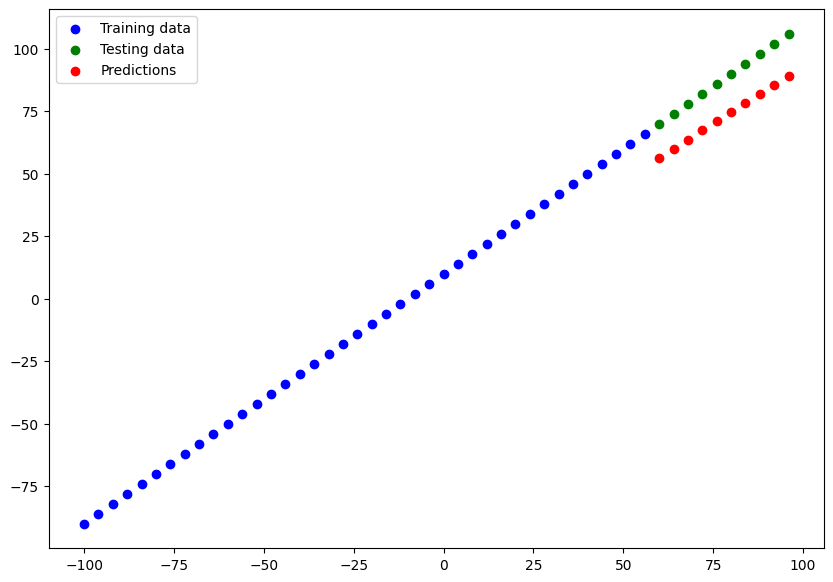

In [37]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_label=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"


In [38]:
# Evaluate the model on the test
model.evaluate(tf.expand_dims(X_test,axis=-1), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 15.2354 - mae: 15.2354


[15.235433578491211, 15.235433578491211]

In [39]:
# Calculate mean absolute error
mae = tf.keras.losses.mae(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.544209 , 13.920036 , 14.295864 , 14.671692 , 15.0475235,
       15.423347 , 15.799179 , 16.175003 , 16.550827 , 16.926659 ],
      dtype=float32)>

In [40]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[56.45579 ],
       [60.079964],
       [63.704136],
       [67.32831 ],
       [70.95248 ],
       [74.57665 ],
       [78.20082 ],
       [81.825   ],
       [85.44917 ],
       [89.07334 ]], dtype=float32)>

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56.45579 , 60.079964, 63.704136, 67.32831 , 70.95248 , 74.57665 ,
       78.20082 , 81.825   , 85.44917 , 89.07334 ], dtype=float32)>

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=15.235433578491211>

In [44]:
# Calculate the mean square error
mse = tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=233.2837371826172>

In [45]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true, y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> .....
```
1. Get more data - get more examples for your model to train on ( more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger ( using a more complex model ) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modellling experiments:

1. `model_1` - same as original mdoel, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

** Build `model_1`

In [46]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 23.4507 - mae: 23.4507 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.0613 - mae: 12.0613 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.7192 - mae: 12.7192 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.2265 - mae: 8.2265
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.8855 - mae: 8.8855
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.8232 - mae: 7.8232 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.8064 - mae: 10.8064
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6245 - mae: 7.6245
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9807 - mae: 11.9807
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.1445 - mae: 8.1445
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.7970 - mae: 8.7970
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.7509 - mae: 7.7509
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


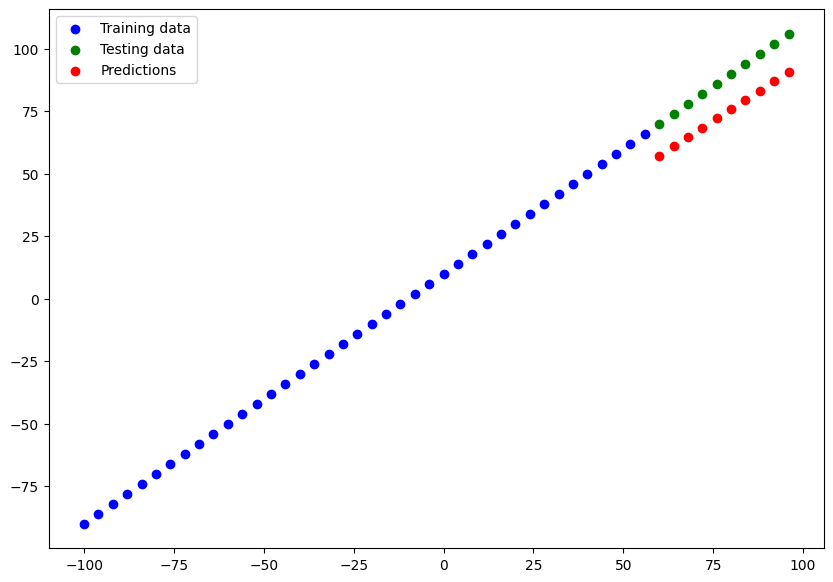

In [47]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_label=y_test,predictions=y_preds_1)

In [48]:
# Calculate mode_1 evaluation metrics
mae_1 = mae(y_true=y_test, y_pred = tf.squeeze(y_preds_1))
mse_1 = mse(y_true=y_test, y_pred = tf.squeeze(y_preds_1))
mse_1, mae_1

(<tf.Tensor: shape=(), dtype=float32, numpy=196.64161682128906>,
 <tf.Tensor: shape=(), dtype=float32, numpy=14.000239372253418>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [49]:
# 0. Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model_2
model_2.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# 3. Train the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 49.7080 - mse: 3417.8787 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 36.2194 - mse: 1805.6034
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 29.4829 - mse: 1198.3002
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.6167 - mse: 422.1212
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 19.1877 - mse: 497.1917
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.8538 - mse: 429.6002
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.1014 - mse: 230.5191
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.9337 - mse: 312.0342
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.6550 - mse: 332.7513
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.6598 - mse: 213.8545
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.6158 - mse: 297.7089
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.6395 - mse: 329.9524
Epoch 13/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


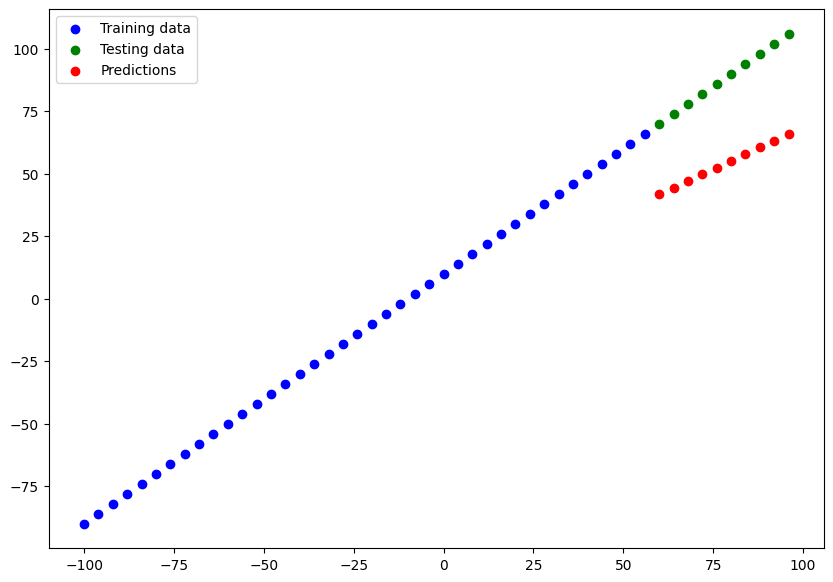

In [50]:
# Predict and Plot Predictions
y_pred_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))

plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_label=y_test, predictions=y_pred_2)

In [51]:
# Calculate Losses
mae_2 = mae(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mse_2 = mse(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mae_2, mse_2


(<tf.Tensor: shape=(), dtype=float32, numpy=34.17763137817383>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1182.5631103515625>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [53]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 31.0386 - mae: 31.0386
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 25.5179 - mae: 25.5179
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 24.1081 - mae: 24.1081
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.5491 - mae: 14.5491
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 18.5963 - mae: 18.5963
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.3706 - mae: 12.3706
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15.1633 - mae: 15.1633
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 15.7768 - mae: 15.7768
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.6900 - mae: 11.6900
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.6355 - mae: 14.6355
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 15.6335 - mae: 15.6335
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.8404 - mae: 11.8404
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


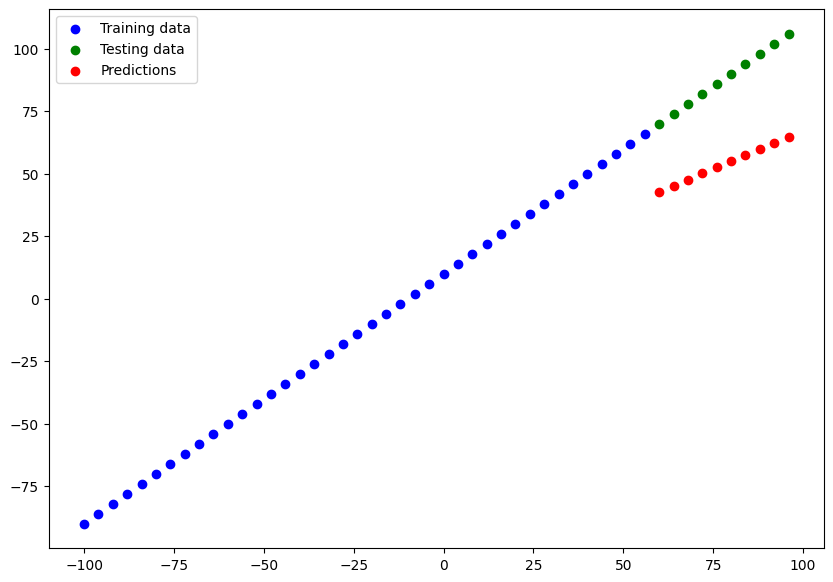

In [57]:
# Make and plot some predictions
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=-1) )

plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics

mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [63]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],["model_2", mae_2.numpy(), mse_2.numpy()], ["model_3", mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.000239,196.641617
1,model_2,34.177631,1182.563110
2,model_3,34.217262,1191.123779


Looks like `model_1` performed the best

In [65]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

> **Note:** : One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - component of the TensorFlow library to help track modelling experiments ( we'll see this one later)
* Weights and Biases - a tool for tracking all kinds of machine learning experiments ( plugs straight into tensor board)

## Saving our models

Saving our models allows us to use them outside of Google Colab ( or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our mode's too:

1. The SavedModel format
2. The HDF5 format

In [69]:
# Save model
model_1.save("best_model_SavedModel_format.keras")

In [70]:
# Save model to HDF5 Format
model_1.save("best_model_HDF5_format.h5")